This code is basically the same as model_training.py except written in a jupyter notebook so it can work with google colab.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn.metrics import confusion_matrix

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [4]:
#seed allows for exact repeateability
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [7]:
#Change file names in the following two
cook_df = pd.read_csv('./samples/cook.csv')
flick_df = pd.read_csv('./samples/flickup.csv')
jog_df = pd.read_csv('./samples/jog.csv')

#getting rid of last 5 elements from flick_df and extra elements from jog.csv
flick_df = flick_df[0:len(flick_df)-10]
jog_df = jog_df[0:len(jog_df)-120]

#since one second is about 118 rows, im getting rid of the extra rows that would make it evenly divisible
cook_df = cook_df[0:len(cook_df)-len(cook_df)%118]
flick_df = flick_df[0:len(flick_df)-len(flick_df)%118]
jog_df = jog_df[0:len(jog_df)-len(jog_df)%118]


print(cook_df.info())
print(flick_df.info())
print(jog_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5782 non-null   int64  
 1   Ax      5782 non-null   float64
 2   Ay      5782 non-null   float64
 3   Az      5782 non-null   float64
 4   Gx      5782 non-null   float64
 5   Gy      5782 non-null   float64
 6   Gz      5782 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 316.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5782 non-null   int64  
 1   Ax      5782 non-null   float64
 2   Ay      5782 non-null   float64
 3   Az      5782 non-null   float64
 4   Gx      5782 non-null   float64
 5   Gy      5782 non-null   float64
 6   Gz      5782 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 316.3 KB
None
<class '

In [8]:
#scaling this puts all the values between 0 and 1
cook_df[['Ax','Ay','Az']] = (cook_df[['Ax','Ay','Az']] + 4)/8
flick_df[['Ax','Ay','Az']] = (flick_df[['Ax','Ay','Az']] + 4)/8
jog_df[['Ax','Ay','Az']] = (jog_df[['Ax','Ay','Az']] + 4)/8


cook_df[['Gx','Gy','Gz']] = (cook_df[['Gx','Gy','Gz']] + 2000)/4000
flick_df[['Gx','Gy','Gz']] = (flick_df[['Gx','Gy','Gz']] + 2000)/4000
jog_df[['Gx','Gy','Gz']] = (jog_df[['Gx','Gy','Gz']] + 2000)/4000

cook_df['Class'] = 'cook'
flick_df['Class'] = 'flick'
jog_df['Class'] = 'jog'

print(jog_df.head())
print(flick_df.info())

   Time        Ax        Ay        Az        Gx        Gy        Gz  Class
0     2  0.530854  0.587951  0.601914  0.485809  0.489273  0.506958  flick
1    11  0.551118  0.602448  0.619857  0.485672  0.492020  0.508347  flick
2    20  0.564361  0.605911  0.633393  0.484222  0.493546  0.509857  flick
3    29  0.577454  0.614441  0.649200  0.482834  0.496689  0.511261  flick
4    38  0.599304  0.619247  0.661499  0.482941  0.499023  0.512115  flick
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5782 non-null   int64  
 1   Ax      5782 non-null   float64
 2   Ay      5782 non-null   float64
 3   Az      5782 non-null   float64
 4   Gx      5782 non-null   float64
 5   Gy      5782 non-null   float64
 6   Gz      5782 non-null   float64
 7   Class   5782 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 361.5+ KB
None


In [6]:
# #one hot encoding manually
# cook_df['Class'] = 0
# flick_df['Class'] = 1

# print(flick_df.head())
# print(flick_df.info())

   Time        Ax        Ay        Az        Gx        Gy        Gz  Class
0     2  0.486405  0.478210  0.671585  0.497223  0.510376  0.499649      1
1    10  0.493500  0.474228  0.670349  0.496780  0.515778  0.498718      1
2    18  0.492096  0.476258  0.679122  0.496170  0.519775  0.497681      1
3    26  0.488556  0.478942  0.683990  0.496490  0.525742  0.496445      1
4    34  0.481857  0.476761  0.675095  0.497879  0.531738  0.495636      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5782 non-null   int64  
 1   Ax      5782 non-null   float64
 2   Ay      5782 non-null   float64
 3   Az      5782 non-null   float64
 4   Gx      5782 non-null   float64
 5   Gy      5782 non-null   float64
 6   Gz      5782 non-null   float64
 7   Class   5782 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 361.5 KB
None


In [9]:
def formatData(X,Y, window):
    Xarr = []
    Yarr = []

    for i in range(0, window*(len(X)//window), int(window)):
        Xarr.append(X.iloc[i:i+window].values)  
        Yarr.append(Y.iloc[0])

    return np.array(Xarr), np.array(Yarr)

In [7]:
print(cook_df[['Class']])

     Class
0     cook
1     cook
2     cook
3     cook
4     cook
...    ...
5777  cook
5778  cook
5779  cook
5780  cook
5781  cook

[5782 rows x 1 columns]


In [8]:
window = 119
cook_x, cook_y = formatData(cook_df[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']], cook_df[['Class']], window)
flick_x, flick_y = formatData(flick_df[['Ax', 'Ay', 'Az','Gx', 'Gy', 'Gz']], flick_df[['Class']], window)
jog_x, jog_y = formatData(jog_df[['Ax', 'Ay', 'Az','Gx', 'Gy', 'Gz']], jog_df[['Class']], window)



print(jog_x[:4])
print(cook_y[:4])

[[[0.486405   0.47821    0.671585   0.4972229  0.51037598 0.49964905]
  [0.4935     0.4742275  0.67034875 0.49678039 0.51577759 0.49871826]
  [0.49209625 0.4762575  0.6791225  0.49617005 0.51977539 0.49768066]
  ...
  [0.59964    0.4995875  0.44567875 0.50679016 0.4851532  0.50369263]
  [0.59732    0.49827625 0.4426425  0.50509644 0.4851532  0.50369263]
  [0.59516875 0.49466    0.44278    0.5040741  0.47891235 0.50323486]]

 [[0.59375    0.48991375 0.4458925  0.50413513 0.47233582 0.50358581]
  [0.58781375 0.48468    0.44551125 0.50570679 0.46484375 0.50468445]
  [0.5791625  0.47847    0.44493125 0.50782776 0.45605469 0.50683594]
  ...
  [0.5022425  0.4968875  0.64238    0.50941467 0.45953369 0.50071716]
  [0.49321    0.49180625 0.6428075  0.50769043 0.4621582  0.49813843]
  [0.48400875 0.48756375 0.6454925  0.50474548 0.46562195 0.49653625]]

 [[0.476395   0.48381    0.65332    0.50108337 0.46910095 0.4961853 ]
  [0.47062625 0.4798275  0.6634375  0.49812317 0.47268677 0.49678039]
  [0

In [9]:
#concatenating the flick and cook datasets before randomizing
inputs = np.concatenate((cook_x, flick_x, jog_x))
outputs = np.concatenate((cook_y, flick_y, jog_y))

print(cook_x.shape)
print(inputs.shape)
print(outputs.shape)

(48, 119, 6)
(96, 119, 6)
(96, 1)


In [10]:
#One hot encoding with sklearn
enc = OneHotEncoder(handle_unknown= 'ignore', sparse_output=False)
enc.fit(outputs)

outputs = enc.transform(outputs)
print(outputs.shape)
print(outputs[:5])

lb = LabelBinarizer()
lb.fit(outputs)

outputs = lb.transform(outputs)

(96, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [10]:
##This code goes with the manual one hot encoding
# updated_output = np.zeros((96,2))
# for i in range(outputs.shape[0]):
#   if outputs[i][0] == 0:
#     updated_output[i] = np.append(outputs[i], 1)
#   else:
#     updated_output[i] = np.append(outputs[i], 0)

# outputs = updated_output
# print(outputs.shape)
# print(outputs[:5])

(96, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [11]:
#shape needs to be formatted such that the inputs to each example is in a 1D representation

inputs = inputs.reshape(-1, 119*6)
print(inputs.shape)

(96, 714)


In [12]:
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


In [13]:
print(inputs_train.shape, inputs_test.shape, inputs_validate.shape)
print(outputs_train.shape)

(57, 714) (19, 714) (20, 714)
(57, 2)


In [14]:
model = keras.Sequential()
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(15, activation= 'relu'))
model.add(layers.Dense(2, activation= 'softmax'))
model.compile(optimizer= 'rmsprop', loss= 'mse', metrics=['mae', 'accuracy'])
          

In [15]:
history = model.fit(inputs_train, outputs_train, epochs = 70, batch_size = 1, validation_data=(inputs_validate, outputs_validate))

Epoch 1/70
57/57 [==============================] - 1s 4ms/step - loss: 0.2861 - mae: 0.5203 - val_loss: 0.2764 - val_mae: 0.5172
Epoch 2/70
57/57 [==============================] - 0s 2ms/step - loss: 0.2563 - mae: 0.5003 - val_loss: 0.2827 - val_mae: 0.5213
Epoch 3/70
57/57 [==============================] - 0s 2ms/step - loss: 0.2548 - mae: 0.4982 - val_loss: 0.2586 - val_mae: 0.5069
Epoch 4/70
57/57 [==============================] - 0s 2ms/step - loss: 0.2550 - mae: 0.5001 - val_loss: 0.2649 - val_mae: 0.5098
Epoch 5/70
57/57 [==============================] - 0s 2ms/step - loss: 0.2452 - mae: 0.4884 - val_loss: 0.2670 - val_mae: 0.5092
Epoch 6/70
57/57 [==============================] - 0s 2ms/step - loss: 0.2446 - mae: 0.4894 - val_loss: 0.2617 - val_mae: 0.5045
Epoch 7/70
57/57 [==============================] - 0s 2ms/step - loss: 0.2408 - mae: 0.4822 - val_loss: 0.2367 - val_mae: 0.4860
Epoch 8/70
57/57 [==============================] - 0s 2ms/step - loss: 0.2352 - mae: 0.48

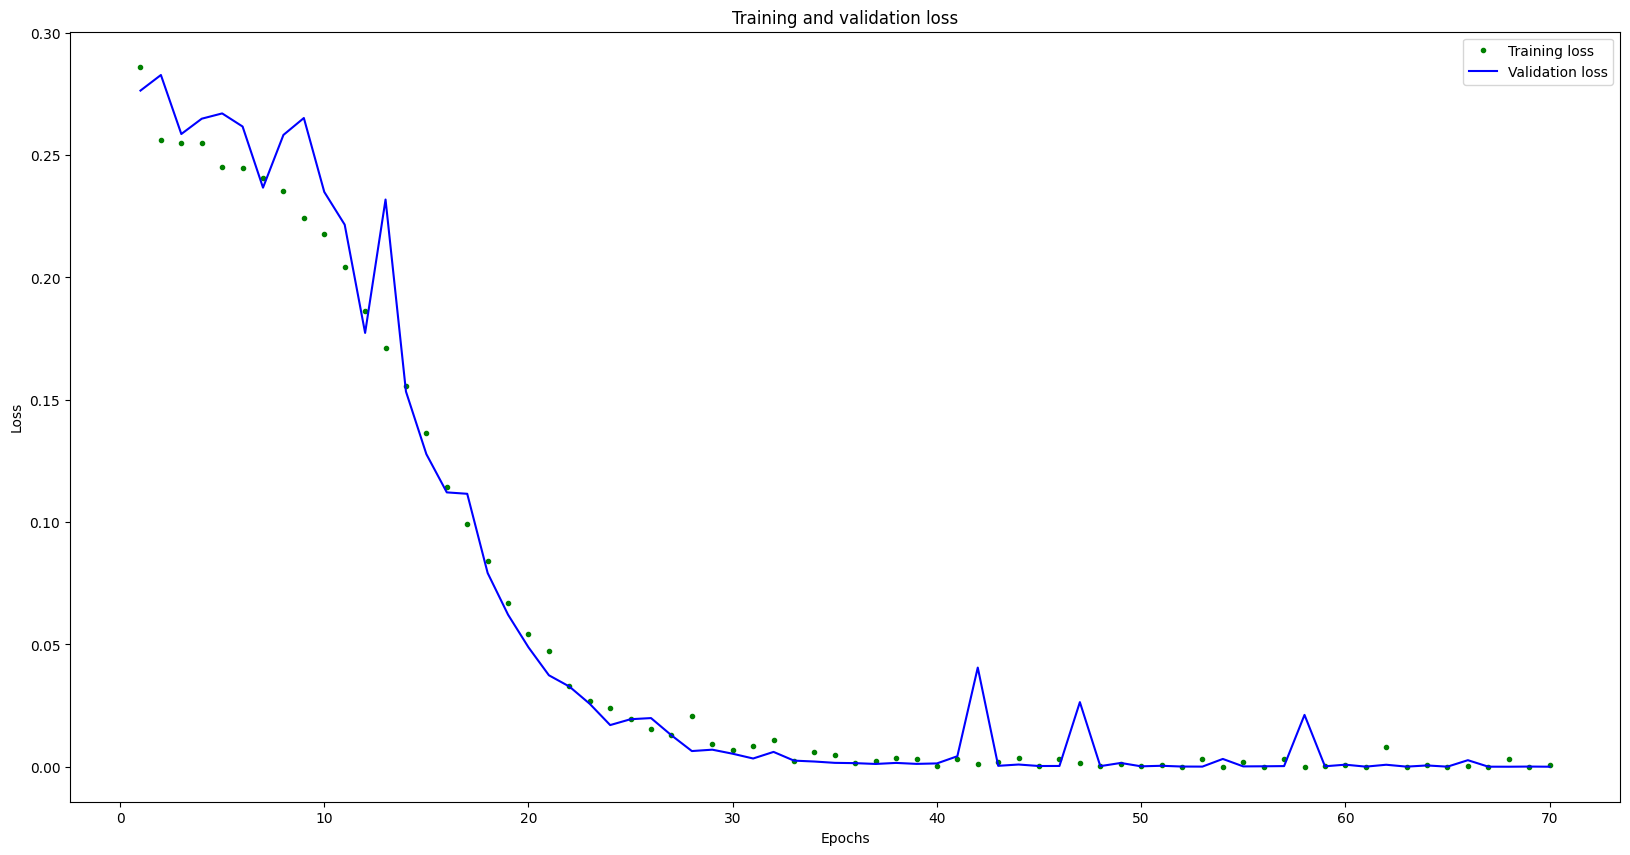

[20.0, 10.0]


In [16]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

In [17]:
#saving model 
model.save('model.h5')

In [18]:
np.save('inputs_test.npy', inputs_test)
np.save('outputs_test.npy', outputs_test)

In [26]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

1/1 [==============================] - 0s 19ms/step
predictions =
 [[1.    0.   ]
 [1.    0.   ]
 [0.996 0.004]
 [0.999 0.001]
 [1.    0.   ]
 [0.006 0.994]
 [0.006 0.994]
 [1.    0.   ]
 [0.006 0.994]
 [0.006 0.994]
 [0.006 0.994]
 [0.999 0.001]
 [1.    0.   ]
 [0.006 0.994]
 [0.006 0.994]
 [0.006 0.994]
 [1.    0.   ]
 [0.006 0.994]
 [0.006 0.994]]
actual =
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [27]:
def getMetrics(pred, gt, threshold = 0.7):
    
    # get locations of indexes with postive indentificaitons
    pred_labels = np.argmax(pred, axis=1)
    gt_labels = np.argmax(gt, axis= 1)
    
    #get number of values that dont meet required identification threshold
    below_threshold = sum(np.max(pred, axis=1) < threshold)

    num_correct = sum(pred_labels == gt_labels) - below_threshold
    num_predictions = len(pred)

    accuracy = num_correct/num_predictions
    print("Accuracy: {:.6%}".format(accuracy))

    return accuracy

In [32]:
def plot_cm(gt, pred, class_names, threshold = None):
  cm = confusion_matrix(gt, pred)
  fig, ax = plt.subplots(figsize=(18, 16)) 
  ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap=sns.diverging_palette(220, 20, n=7),
      ax=ax
  )

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names)
  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values
  plt.show() # ta-da!

In [35]:
getMetrics(predictions, outputs_test, threshold=0.998)

plot_cm(
    enc.inverse_transform(outputs_test, threshold= 0.998),
    enc.inverse_transform(predictions,threshold= 0.998),
    enc.categories_[0]
)

Accuracy: 42.105263%


TypeError: OneHotEncoder.inverse_transform() got an unexpected keyword argument 'threshold'